In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

from sklearn.linear_model import Lasso, Ridge,ElasticNet

In [183]:
data = pd.read_csv("data_poly.csv")

In [184]:
data

,x,y
0,0,3
1,1,4
2,2,5
3,3,7
4,4,10
5,5,8
6,6,9
7,7,10
8,8,10
9,9,23


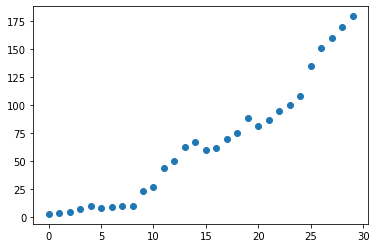

In [185]:
plt.scatter(data['x'], data['y'])

In [186]:
X = data[['x']]
y = data['y']

In [187]:
X

,x
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [235]:
poly= PolynomialFeatures(degree=2, include_bias=False)
poly_1= PolynomialFeatures(degree=5, include_bias=False)


In [236]:
poly_x = poly.fit_transform(X)
poly_x1 = poly_1.fit_transform(X)

In [269]:
poly_model = LinearRegression()
linear_model = LinearRegression()
poly_model_1 = LinearRegression()
poly_model_ridge = Ridge(alpha=100)
poly_model_lasso = Lasso(alpha=100)
poly_model_elastic = ElasticNet(alpha=1, l1_ratio=0.5)


In [271]:
poly_model.fit(poly_x, y)
linear_model.fit(X,y)
poly_model_1.fit(poly_x1, y)
poly_model_ridge.fit(poly_x1, y)
poly_model_lasso.fit(poly_x1, y)
poly_model_elastic.fit(poly_x1, y)

/Users/noordeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.625e+03, tolerance: 8.440e+00
  model = cd_fast.enet_coordinate_descent(
/Users/noordeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.189e+02, tolerance: 8.440e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1)

In [272]:
poly_predict = poly_model.predict(poly_x)
linear_predict = linear_model.predict(X)
poly_predict_1 = poly_model_1.predict(poly_x1)
poly_predict_2 = poly_model_ridge.predict(poly_x1)
poly_predict3 = poly_model_lasso.predict(poly_x1)
poly_predict4 = poly_model_elastic.predict(poly_x1)


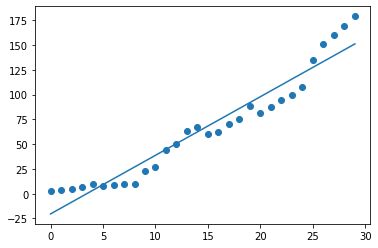

In [273]:
plt.scatter(data['x'], data['y'])
plt.plot(linear_predict)


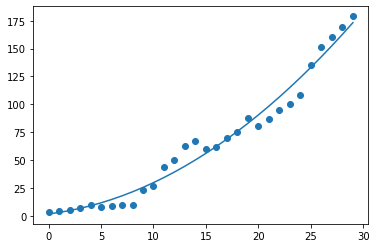

In [274]:
plt.scatter(data['x'], data['y'])
plt.plot(poly_predict)


<AxesSubplot:>

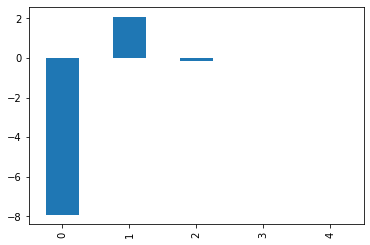

In [275]:
pd.Series(poly_model_1.coef_).plot(kind = 'bar')

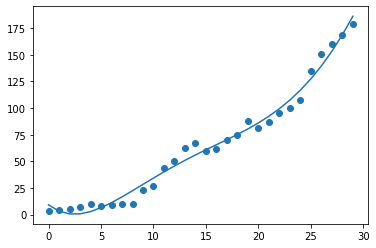

In [276]:
plt.scatter(data['x'], data['y'])
plt.plot(poly_predict_1)

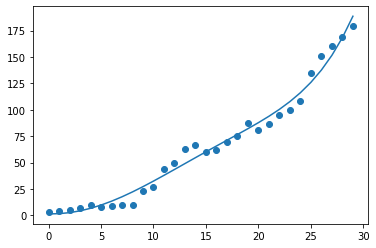

In [277]:
plt.scatter(data['x'], data['y'])
plt.plot(poly_predict_2)

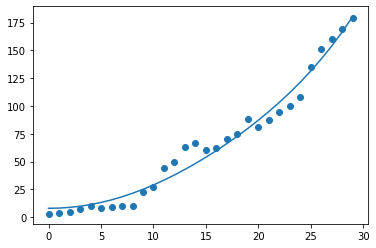

In [278]:
plt.scatter(data['x'], data['y'])
plt.plot(poly_predict3)

<AxesSubplot:>

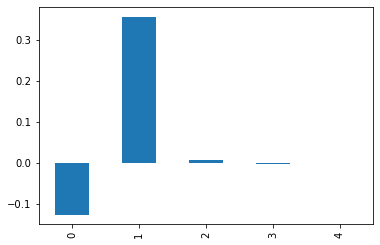

In [279]:

pd.Series(poly_model_ridge.coef_).plot(kind = 'bar')

In [280]:
poly_model_ridge.coef_

array([-1.25494238e-01,  3.56518451e-01,  6.31770245e-03, -1.27145760e-03,
        3.10188961e-05])

<AxesSubplot:>

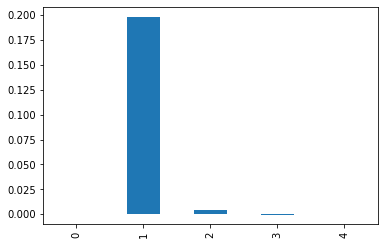

In [281]:
pd.Series(poly_model_lasso.coef_).plot(kind = 'bar')

In [282]:
poly_model_lasso.coef_

array([ 0.00000000e+00,  1.98222706e-01,  3.91757796e-03, -3.50550937e-04,
        7.71728421e-06])

In [283]:
poly_model_elastic.coef_

array([ 8.84274923e-01,  3.45757753e-01, -1.12146454e-02, -2.54759373e-05,
        7.77308206e-06])

<AxesSubplot:>

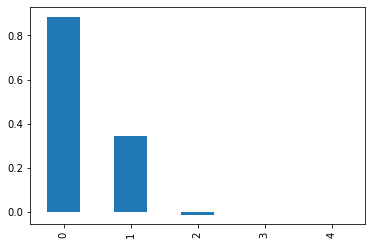

In [284]:
pd.Series(poly_model_elastic.coef_).plot(kind = 'bar')

In [173]:
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.4, random_state=2)

In [162]:
def model_run(model, train_x, train_y, test_x, test_y):
    model.fit(train_x, train_y)
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)
    train_rmse = (r2_score(train_y, train_pred))
    test_rmse = (r2_score(test_y, test_pred))
    return train_rmse, test_rmse
    

In [163]:
train_res = []
test_res = []


for i in range(0,10):
    if i==0:
        model = LinearRegression()
        train_rmse, test_rmse = model_run(model, train_x, train_y, test_x, test_y)
        train_res.append(1-train_rmse)
        test_res.append(1-test_rmse)
        
    else:
        poly= PolynomialFeatures(degree=i, include_bias=False)
        poly_train_x = poly.fit_transform(train_x)
        poly_test_x = poly.fit_transform(test_x)
        poly_model = LinearRegression()
        train_rmse, test_rmse = model_run(poly_model, poly_train_x, train_y, poly_test_x, test_y)
        train_res.append(1-train_rmse)
        test_res.append(1-test_rmse)



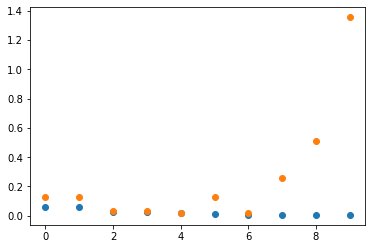

In [164]:
plt.scatter(range(0,10),train_res)
plt.scatter(range(0,10),test_res)
